In [1]:
from keras.utils import image_dataset_from_directory, set_random_seed
from keras.models import load_model
import matplotlib.pyplot as plt
from numpy import asarray
from pickle import load
from collections import Counter

In [2]:
set_random_seed(10)

In [3]:
img_size = (256, 256)
class_names = ['NORMAL', 'PNEUMONIA']
dataset_dir = '/Users/snoopy/Desktop/Other/Harvard/Final Project/pediatric-chest-xrays/chest_xray'
color_mode = 'rgb'
num_channels = 3

In [4]:
test_data = image_dataset_from_directory(directory=dataset_dir+'/test',
                                          label_mode='binary',
                                          class_names=class_names,
                                          color_mode=color_mode,
                                          image_size=img_size)

Found 624 files belonging to 2 classes.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-31 16:52:11.589269: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-31 16:52:11.589374: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model = load_model('/Users/snoopy/Desktop/Other/Harvard/Final Project/pediatric-chest-xrays/pediatric-resnet-weighted/pediatric_resnet18_weighted')

In [6]:
model.summary()

Model: "resnet_18_classifier"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 bn_data (BatchNormalization)   (None, 256, 256, 3)  9           ['rescaling[0][0]']              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['bn_data[0][0

In [7]:
with open('/Users/snoopy/Desktop/Other/Harvard/Final Project/pediatric-chest-xrays/pediatric-resnet-weighted/pediatric_resnet18_weighted_history_dump', 'rb') as f:
    history = load(f)

In [8]:
train_precision = asarray(history.history['precision'])
train_recall = asarray(history.history['recall'])
val_precision = asarray(history.history['val_precision'])
val_recall = asarray(history.history['val_recall'])
train_f1 = 2./(1./train_precision+1./train_recall)
val_f1 = 2./(1./val_precision+1./val_recall)

In [9]:
epochs = range(len(history.history['loss']))

In [10]:
print("Train precision: ", train_precision[-1])
print("Train recall: ", train_recall[-1])
print("Validation precision: ", val_precision[-1])
print("Validation recall: ", val_recall[-1])
print("F1 score in train set: ", train_f1[-1])
print("F1 score on validation set: ", val_f1[-1])

Train precision:  1.0
Train recall:  1.0
Validation precision:  0.9973753094673157
Validation recall:  0.9986860156059265
F1 score in train set:  1.0
F1 score on validation set:  0.9980302322015006


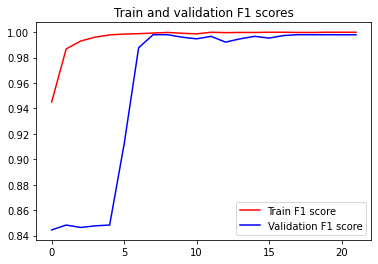

In [11]:
plt.figure()
plt.plot(epochs, train_f1, 'r', label='Train F1 score')
plt.plot(epochs, val_f1, 'b', label='Validation F1 score')
plt.title('Train and validation F1 scores')
plt.legend()
plt.show()

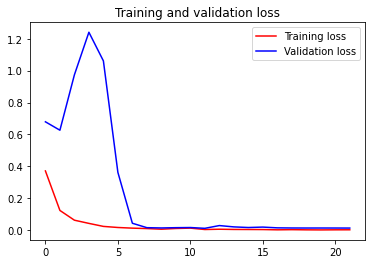

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

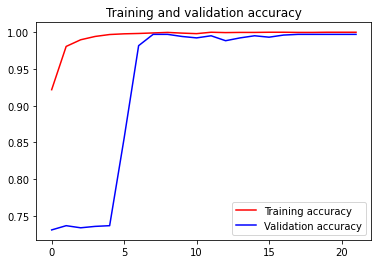

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [14]:
test_history = model.evaluate(test_data, verbose=1)

2022-07-31 16:52:21.777357: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-31 16:52:21.777762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 4s 154ms/step - loss: 0.7097 - accuracy: 0.8349 - precision: 0.7923 - recall: 0.9974 - auc: 0.9137


In [15]:
test_pred = model.predict(test_data, verbose=1)

2022-07-31 16:52:25.599402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 3s 148ms/step


In [16]:
pred_labels = []
for pred in test_pred:
    if pred>0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)

Counter(pred_labels)

Counter({1: 491, 0: 133})

In [17]:
test_acc = test_history[1]
test_precision = test_history[2]
test_recall = test_history[3]
test_f1 = 2./(1./test_precision+1./test_recall)

In [18]:
print("Test accuracy: ", test_acc)
print("Test precision: ", test_precision)
print("Test recall: ", test_recall)
print("F1 score on test set: ", test_f1)

Test accuracy:  0.8349359035491943
Test precision:  0.7922607064247131
Test recall:  0.9974359273910522
F1 score on test set:  0.8830874210937041
